# alexnet


In [ ]:
!git clone https://github.com/bochendong/few_shot_classification.git

Cloning into 'few_shot_classification'...
remote: Enumerating objects: 13216, done.
remote: Counting objects: 100% (64/64), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 13216 (delta 31), reused 47 (delta 17), pack-reused 13152 (from 1)
Receiving objects: 100% (13216/13216), 437.31 MiB | 17.20 MiB/s, done.
Resolving deltas: 100% (487/487), done.
Updating files: 100% (29045/29045), done.


In [ ]:
import os
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn as nn
import torchvision.models as models
import matplotlib.pyplot as plt
from tqdm import tqdm

In [ ]:
# Data paths
train_dir = '/content/few_shot_classification/code/train'
val_dir = '/content/few_shot_classification/code/val'

# Data transformations (image preprocessing)
train_transforms = transforms.Compose([
    transforms.Resize((128, 128)),          # Resize image dimensions
    # transforms.RandomHorizontalFlip(),         # Random horizontal flip
    # transforms.RandomRotation(10),             # Random rotation (angle range: -15 to 15 degrees)
    # transforms.RandomCrop(120),               # Random crop (120x120)
    # transforms.RandomResizedCrop(128, scale=(0.8, 1.0)),  # Random resized crop
    # transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),  # Random translation (10%)
    # transforms.RandomPerspective(distortion_scale=0.2, p=0.5), # Random perspective distortion
    # transforms.GaussianBlur(kernel_size=(5, 5), sigma=(0.1, 2.0)), # Gaussian blur
    transforms.ToTensor(),                  # Convert image to tensor
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize
])

val_transforms = transforms.Compose([
    transforms.Resize((128, 128)),          # Resize image dimensions
    transforms.ToTensor(),                  # Convert image to tensor
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize
])

# Load data using ImageFolder
train_dataset = ImageFolder(root=train_dir, transform=train_transforms)
val_dataset = ImageFolder(root=val_dir, transform=val_transforms)

# Check classes
print(len(train_dataset.classes))          # Print number of classes
print(train_dataset.classes)               # Print list of class names

# Create data loaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

150
['Abra', 'Aerodactyl', 'Alakazam', 'Alolan Sandslash', 'Arbok', 'Arcanine', 'Articuno', 'Beedrill', 'Bellsprout', 'Blastoise', 'Bulbasaur', 'Butterfree', 'Caterpie', 'Chansey', 'Charizard', 'Charmander', 'Charmeleon', 'Clefable', 'Clefairy', 'Cloyster', 'Cubone', 'Dewgong', 'Diglett', 'Ditto', 'Dodrio', 'Doduo', 'Dragonair', 'Dragonite', 'Dratini', 'Drowzee', 'Dugtrio', 'Eevee', 'Ekans', 'Electabuzz', 'Electrode', 'Exeggcute', 'Exeggutor', 'Farfetchd', 'Fearow', 'Flareon', 'Gastly', 'Gengar', 'Geodude', 'Gloom', 'Golbat', 'Goldeen', 'Golduck', 'Golem', 'Graveler', 'Grimer', 'Growlithe', 'Gyarados', 'Haunter', 'Hitmonchan', 'Hitmonlee', 'Horsea', 'Hypno', 'Ivysaur', 'Jigglypuff', 'Jolteon', 'Jynx', 'Kabuto', 'Kabutops', 'Kadabra', 'Kakuna', 'Kangaskhan', 'Kingler', 'Koffing', 'Krabby', 'Lapras', 'Lickitung', 'Machamp', 'Machoke', 'Machop', 'Magikarp', 'Magmar', 'Magnemite', 'Magneton', 'Mankey', 'Marowak', 'Meowth', 'Metapod', 'Mew', 'Mewtwo', 'Moltres', 'MrMime', 'Muk', 'Nidoking',

In [ ]:
# GPU setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
use_pretrained = False  # Use pretrained parameters

# Load and modify AlexNet model
alexnet = models.alexnet(pretrained=use_pretrained)
num_classes = 150  # Define the number of classes

# Modify the classifier part of AlexNet
alexnet.classifier[6] = nn.Linear(alexnet.classifier[6].in_features, num_classes)
alexnet = alexnet.to(device)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(alexnet.parameters(), lr=0.001)

# Print the model structure
print(alexnet)

# Training and validation loop
num_epochs = 50

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:01<00:00, 220MB/s]


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
def plot_training_results(train_losses, val_losses, train_accuracies, val_accuracies):
    # Loss graph
    plt.figure(figsize=(12, 6))
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.title('Loss Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Accuracy graph
    plt.figure(figsize=(12, 6))
    plt.plot(train_accuracies, label='Train Accuracy')
    plt.plot(val_accuracies, label='Validation Accuracy')
    plt.title('Accuracy Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# use_pretrained= False

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


classifier.6.weight
classifier.6.bias
--------------------------------------------------
Epoch 1/30


train: 100%|██████████| 147/147 [00:16<00:00,  8.77it/s]


train - Loss: 5.0106, Acc: 0.0068


val: 100%|██████████| 43/43 [00:04<00:00,  8.81it/s]


val - Loss: 5.0103, Acc: 0.0103
Epoch 2/30


train: 100%|██████████| 147/147 [00:15<00:00,  9.21it/s]


train - Loss: 5.0102, Acc: 0.0066


val: 100%|██████████| 43/43 [00:05<00:00,  7.83it/s]


val - Loss: 5.0101, Acc: 0.0088
Epoch 3/30


train: 100%|██████████| 147/147 [00:17<00:00,  8.48it/s]


train - Loss: 5.0101, Acc: 0.0083


val: 100%|██████████| 43/43 [00:05<00:00,  7.90it/s]


val - Loss: 5.0098, Acc: 0.0088
Epoch 4/30


train: 100%|██████████| 147/147 [00:17<00:00,  8.60it/s]


train - Loss: 5.0097, Acc: 0.0062


val: 100%|██████████| 43/43 [00:04<00:00,  9.36it/s]


val - Loss: 5.0096, Acc: 0.0110
Epoch 5/30


train: 100%|██████████| 147/147 [00:16<00:00,  8.72it/s]


train - Loss: 5.0095, Acc: 0.0068


val: 100%|██████████| 43/43 [00:05<00:00,  8.55it/s]


val - Loss: 5.0093, Acc: 0.0125
Epoch 6/30


train: 100%|██████████| 147/147 [00:15<00:00,  9.26it/s]


train - Loss: 5.0093, Acc: 0.0100


val: 100%|██████████| 43/43 [00:05<00:00,  7.78it/s]


val - Loss: 5.0091, Acc: 0.0088
Epoch 7/30


train: 100%|██████████| 147/147 [00:17<00:00,  8.50it/s]


train - Loss: 5.0089, Acc: 0.0085


val: 100%|██████████| 43/43 [00:05<00:00,  8.04it/s]


val - Loss: 5.0089, Acc: 0.0088
Epoch 8/30


train: 100%|██████████| 147/147 [00:16<00:00,  8.86it/s]


train - Loss: 5.0088, Acc: 0.0079


val: 100%|██████████| 43/43 [00:04<00:00,  9.49it/s]


val - Loss: 5.0086, Acc: 0.0088
Epoch 9/30


train: 100%|██████████| 147/147 [00:16<00:00,  8.91it/s]


train - Loss: 5.0085, Acc: 0.0085


val: 100%|██████████| 43/43 [00:05<00:00,  8.37it/s]


val - Loss: 5.0084, Acc: 0.0088
Epoch 10/30


train: 100%|██████████| 147/147 [00:17<00:00,  8.50it/s]


train - Loss: 5.0082, Acc: 0.0089


val: 100%|██████████| 43/43 [00:04<00:00,  9.50it/s]


val - Loss: 5.0082, Acc: 0.0088
Epoch 11/30


train: 100%|██████████| 147/147 [00:17<00:00,  8.53it/s]


train - Loss: 5.0080, Acc: 0.0089


val: 100%|██████████| 43/43 [00:05<00:00,  8.37it/s]


val - Loss: 5.0080, Acc: 0.0088
Epoch 12/30


train: 100%|██████████| 147/147 [00:16<00:00,  8.91it/s]


train - Loss: 5.0078, Acc: 0.0087


val: 100%|██████████| 43/43 [00:05<00:00,  7.94it/s]


val - Loss: 5.0078, Acc: 0.0088
Epoch 13/30


train: 100%|██████████| 147/147 [00:16<00:00,  9.00it/s]


train - Loss: 5.0076, Acc: 0.0085


val: 100%|██████████| 43/43 [00:05<00:00,  7.91it/s]


val - Loss: 5.0076, Acc: 0.0088
Epoch 14/30


train: 100%|██████████| 147/147 [00:17<00:00,  8.38it/s]


train - Loss: 5.0073, Acc: 0.0089


val: 100%|██████████| 43/43 [00:05<00:00,  8.23it/s]


val - Loss: 5.0074, Acc: 0.0088
Epoch 15/30


train: 100%|██████████| 147/147 [00:16<00:00,  8.88it/s]


train - Loss: 5.0072, Acc: 0.0085


val: 100%|██████████| 43/43 [00:04<00:00,  9.40it/s]


val - Loss: 5.0072, Acc: 0.0088
Epoch 16/30


train: 100%|██████████| 147/147 [00:16<00:00,  8.69it/s]


train - Loss: 5.0069, Acc: 0.0089


val: 100%|██████████| 43/43 [00:05<00:00,  8.44it/s]


val - Loss: 5.0070, Acc: 0.0088
Epoch 17/30


train: 100%|██████████| 147/147 [00:17<00:00,  8.61it/s]


train - Loss: 5.0068, Acc: 0.0079


val: 100%|██████████| 43/43 [00:05<00:00,  7.92it/s]


val - Loss: 5.0068, Acc: 0.0088
Epoch 18/30


train: 100%|██████████| 147/147 [00:16<00:00,  9.16it/s]


train - Loss: 5.0066, Acc: 0.0100


val: 100%|██████████| 43/43 [00:05<00:00,  8.59it/s]


val - Loss: 5.0067, Acc: 0.0088
Epoch 19/30


train: 100%|██████████| 147/147 [00:17<00:00,  8.24it/s]


train - Loss: 5.0064, Acc: 0.0098


val: 100%|██████████| 43/43 [00:04<00:00,  8.86it/s]


val - Loss: 5.0065, Acc: 0.0088
Epoch 20/30


train: 100%|██████████| 147/147 [00:17<00:00,  8.45it/s]


train - Loss: 5.0062, Acc: 0.0075


val: 100%|██████████| 43/43 [00:05<00:00,  8.36it/s]


val - Loss: 5.0063, Acc: 0.0088
Epoch 21/30


train: 100%|██████████| 147/147 [00:15<00:00,  9.49it/s]


train - Loss: 5.0061, Acc: 0.0096


val: 100%|██████████| 43/43 [00:05<00:00,  8.50it/s]


val - Loss: 5.0062, Acc: 0.0088
Epoch 22/30


train: 100%|██████████| 147/147 [00:15<00:00,  9.48it/s]


train - Loss: 5.0059, Acc: 0.0100


val: 100%|██████████| 43/43 [00:05<00:00,  8.08it/s]


val - Loss: 5.0060, Acc: 0.0103
Epoch 23/30


train: 100%|██████████| 147/147 [00:16<00:00,  9.07it/s]


train - Loss: 5.0056, Acc: 0.0104


val: 100%|██████████| 43/43 [00:05<00:00,  8.44it/s]


val - Loss: 5.0058, Acc: 0.0103
Epoch 24/30


train: 100%|██████████| 147/147 [00:17<00:00,  8.43it/s]


train - Loss: 5.0056, Acc: 0.0094


val: 100%|██████████| 43/43 [00:05<00:00,  8.55it/s]


val - Loss: 5.0057, Acc: 0.0103
Epoch 25/30


train: 100%|██████████| 147/147 [00:16<00:00,  8.76it/s]


train - Loss: 5.0054, Acc: 0.0107


val: 100%|██████████| 43/43 [00:05<00:00,  7.85it/s]


val - Loss: 5.0055, Acc: 0.0095
Epoch 26/30


train: 100%|██████████| 147/147 [00:16<00:00,  8.86it/s]


train - Loss: 5.0051, Acc: 0.0100


val: 100%|██████████| 43/43 [00:05<00:00,  8.19it/s]


val - Loss: 5.0054, Acc: 0.0095
Epoch 27/30


train: 100%|██████████| 147/147 [00:17<00:00,  8.41it/s]


train - Loss: 5.0050, Acc: 0.0102


val: 100%|██████████| 43/43 [00:05<00:00,  8.02it/s]


val - Loss: 5.0052, Acc: 0.0095
Epoch 28/30


train: 100%|██████████| 147/147 [00:16<00:00,  8.70it/s]


train - Loss: 5.0048, Acc: 0.0096


val: 100%|██████████| 43/43 [00:05<00:00,  8.49it/s]


val - Loss: 5.0051, Acc: 0.0095
Epoch 29/30


train: 100%|██████████| 147/147 [00:17<00:00,  8.36it/s]


train - Loss: 5.0047, Acc: 0.0104


val: 100%|██████████| 43/43 [00:04<00:00,  8.82it/s]


val - Loss: 5.0050, Acc: 0.0095
Epoch 30/30


train: 100%|██████████| 147/147 [00:17<00:00,  8.39it/s]


train - Loss: 5.0046, Acc: 0.0104


val: 100%|██████████| 43/43 [00:05<00:00,  8.18it/s]


val - Loss: 5.0049, Acc: 0.0095


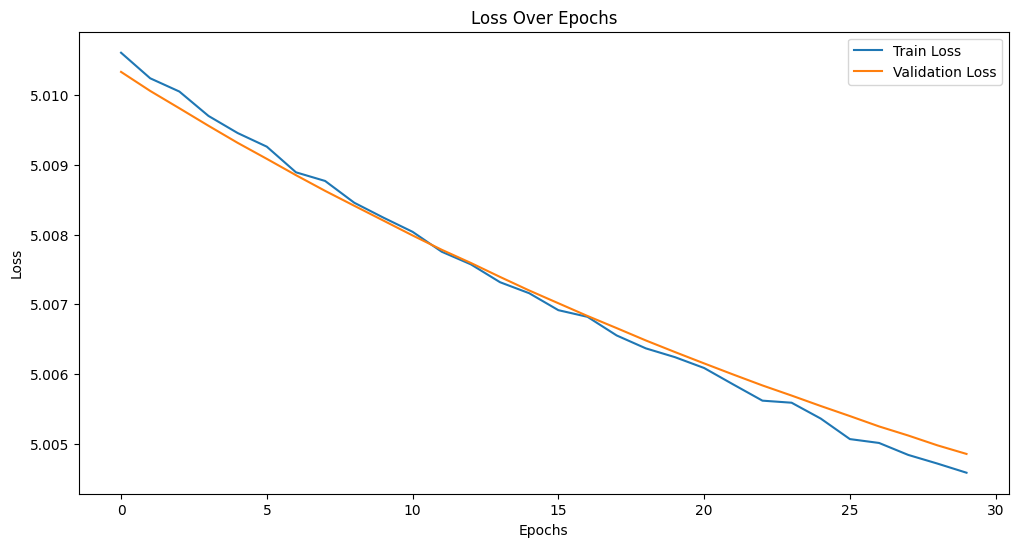

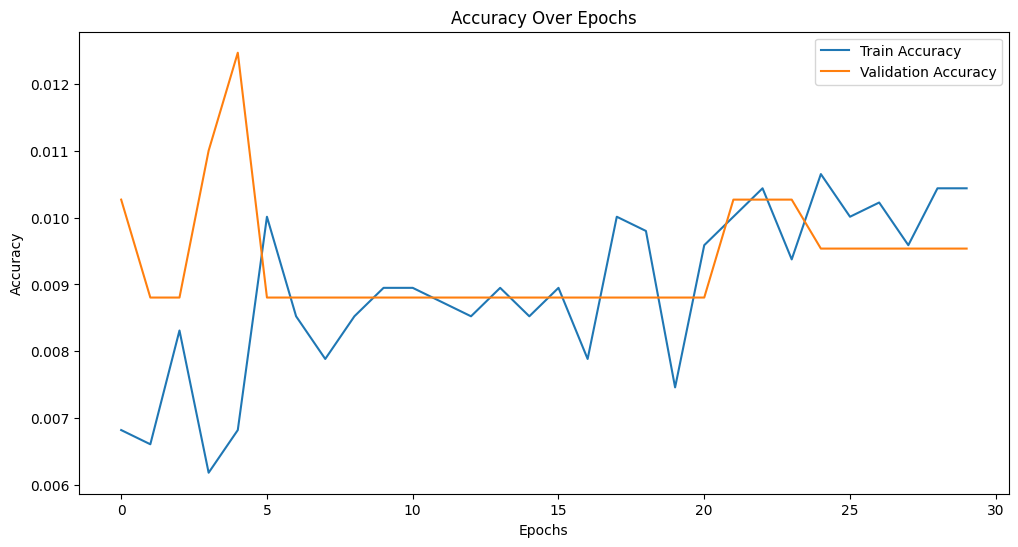

In [ ]:
dataloaders_dict = {'train': train_loader, 'val': val_loader}

# Check operation
batch_iterator = iter(dataloaders_dict['train'])
inputs, labels = next(batch_iterator)

# Load pretrained VGG-16 model
# Create an instance of VGG-16
use_pretrained = False
net = models.alexnet(pretrained=use_pretrained)

# Modify the last layer of the classifier to output 150 classes
net.classifier[6] = nn.Linear(in_features=4096, out_features=150)

# Set the model to training mode
net.train()

# Set the loss function
criterion = nn.CrossEntropyLoss()

params_to_update = []

# Names of parameters to train
update_param_names = ['classifier.6.weight', 'classifier.6.bias']

# Set parameters not to calculate gradients for untrained parameters
for name, param in net.named_parameters():
    if name in update_param_names:
        param.requires_grad = True
        params_to_update.append(param)
        print(name)
    else:
        param.requires_grad = False

# Check the contents of params_to_update
print('-' * 50)

# Use optimization techniques
optimizer = optim.SGD(params=params_to_update, lr=0.001, momentum=0.9)

# Training and validation function
def train_model(net, dataloaders_dict, criterion, optimizer, num_epochs):
    # Initialize lists to store losses and accuracies
    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []

    for epoch in range(num_epochs):
        print(f"Epoch {epoch + 1}/{num_epochs}")

        # Always proceed in the order of train -> val
        for phase in ['train', 'val']:
            if phase == 'train':
                net.train()
            else:
                net.eval()

            epoch_loss = 0.0
            epoch_corrects = 0

            # Process data in batches using the data loader
            for inputs, labels in tqdm(dataloaders_dict[phase], desc=f"{phase}"):
                optimizer.zero_grad()

                # Forward pass and loss calculation
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = net(inputs)
                    loss = criterion(outputs, labels)
                    _, preds = torch.max(outputs, 1)

                    # Backward pass and weight updates during training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # Calculate loss and accuracy
                epoch_loss += loss.item() * inputs.size(0)
                epoch_corrects += torch.sum(preds == labels.data)

            epoch_loss /= len(dataloaders_dict[phase].dataset)
            epoch_acc = epoch_corrects.double() / len(dataloaders_dict[phase].dataset)

            print(f"{phase} - Loss: {epoch_loss:.4f}, Acc: {epoch_acc:.4f}")

            # Save losses and accuracies
            if phase == 'train':
                train_losses.append(epoch_loss)
                train_accuracies.append(epoch_acc.item())
            else:
                val_losses.append(epoch_loss)
                val_accuracies.append(epoch_acc.item())

    # Visualize training results
    plot_training_results(train_losses, val_losses, train_accuracies, val_accuracies)

# Set number of epochs and start training
num_epochs = 30
train_model(net, dataloaders_dict, criterion, optimizer, num_epochs=num_epochs)







# use_pretrained= True

classifier.6.weight
classifier.6.bias
--------------------------------------------------
Epoch 1/30


train: 100%|██████████| 147/147 [00:17<00:00,  8.50it/s]


train - Loss: 3.1054, Acc: 0.3201


val: 100%|██████████| 43/43 [00:05<00:00,  8.00it/s]


val - Loss: 1.8449, Acc: 0.5554
Epoch 2/30


train: 100%|██████████| 147/147 [00:16<00:00,  9.02it/s]


train - Loss: 1.2596, Acc: 0.6746


val: 100%|██████████| 43/43 [00:05<00:00,  7.91it/s]


val - Loss: 1.4976, Acc: 0.6170
Epoch 3/30


train: 100%|██████████| 147/147 [00:17<00:00,  8.54it/s]


train - Loss: 0.8169, Acc: 0.7944


val: 100%|██████████| 43/43 [00:05<00:00,  7.79it/s]


val - Loss: 1.4077, Acc: 0.6427
Epoch 4/30


train: 100%|██████████| 147/147 [00:17<00:00,  8.50it/s]


train - Loss: 0.5888, Acc: 0.8596


val: 100%|██████████| 43/43 [00:05<00:00,  8.13it/s]


val - Loss: 1.3761, Acc: 0.6354
Epoch 5/30


train: 100%|██████████| 147/147 [00:17<00:00,  8.59it/s]


train - Loss: 0.4575, Acc: 0.8930


val: 100%|██████████| 43/43 [00:04<00:00,  8.82it/s]


val - Loss: 1.3550, Acc: 0.6566
Epoch 6/30


train: 100%|██████████| 147/147 [00:16<00:00,  8.74it/s]


train - Loss: 0.3656, Acc: 0.9207


val: 100%|██████████| 43/43 [00:05<00:00,  7.87it/s]


val - Loss: 1.3043, Acc: 0.6684
Epoch 7/30


train: 100%|██████████| 147/147 [00:17<00:00,  8.49it/s]


train - Loss: 0.2938, Acc: 0.9405


val: 100%|██████████| 43/43 [00:04<00:00,  9.26it/s]


val - Loss: 1.2744, Acc: 0.6816
Epoch 8/30


train: 100%|██████████| 147/147 [00:16<00:00,  8.67it/s]


train - Loss: 0.2467, Acc: 0.9542


val: 100%|██████████| 43/43 [00:05<00:00,  8.39it/s]


val - Loss: 1.2734, Acc: 0.6838
Epoch 9/30


train: 100%|██████████| 147/147 [00:17<00:00,  8.43it/s]


train - Loss: 0.2046, Acc: 0.9693


val: 100%|██████████| 43/43 [00:04<00:00,  8.70it/s]


val - Loss: 1.2568, Acc: 0.6867
Epoch 10/30


train: 100%|██████████| 147/147 [00:16<00:00,  8.85it/s]


train - Loss: 0.1862, Acc: 0.9738


val: 100%|██████████| 43/43 [00:04<00:00,  8.62it/s]


val - Loss: 1.2819, Acc: 0.6742
Epoch 11/30


train: 100%|██████████| 147/147 [00:17<00:00,  8.54it/s]


train - Loss: 0.1675, Acc: 0.9746


val: 100%|██████████| 43/43 [00:04<00:00,  9.02it/s]


val - Loss: 1.2777, Acc: 0.6787
Epoch 12/30


train: 100%|██████████| 147/147 [00:15<00:00,  9.26it/s]


train - Loss: 0.1546, Acc: 0.9763


val: 100%|██████████| 43/43 [00:04<00:00,  8.99it/s]


val - Loss: 1.2680, Acc: 0.6794
Epoch 13/30


train: 100%|██████████| 147/147 [00:17<00:00,  8.56it/s]


train - Loss: 0.1368, Acc: 0.9830


val: 100%|██████████| 43/43 [00:05<00:00,  7.98it/s]


val - Loss: 1.2610, Acc: 0.6713
Epoch 14/30


train: 100%|██████████| 147/147 [00:17<00:00,  8.46it/s]


train - Loss: 0.1370, Acc: 0.9789


val: 100%|██████████| 43/43 [00:05<00:00,  8.15it/s]


val - Loss: 1.2454, Acc: 0.6787
Epoch 15/30


train: 100%|██████████| 147/147 [00:17<00:00,  8.58it/s]


train - Loss: 0.1181, Acc: 0.9857


val: 100%|██████████| 43/43 [00:04<00:00,  8.62it/s]


val - Loss: 1.2594, Acc: 0.6831
Epoch 16/30


train: 100%|██████████| 147/147 [00:17<00:00,  8.35it/s]


train - Loss: 0.1086, Acc: 0.9872


val: 100%|██████████| 43/43 [00:04<00:00,  9.06it/s]


val - Loss: 1.2489, Acc: 0.6823
Epoch 17/30


train: 100%|██████████| 147/147 [00:17<00:00,  8.46it/s]


train - Loss: 0.1007, Acc: 0.9866


val: 100%|██████████| 43/43 [00:04<00:00,  9.15it/s]


val - Loss: 1.2647, Acc: 0.6720
Epoch 18/30


train: 100%|██████████| 147/147 [00:17<00:00,  8.55it/s]


train - Loss: 0.1018, Acc: 0.9844


val: 100%|██████████| 43/43 [00:05<00:00,  8.09it/s]


val - Loss: 1.2615, Acc: 0.6867
Epoch 19/30


train: 100%|██████████| 147/147 [00:16<00:00,  8.72it/s]


train - Loss: 0.0897, Acc: 0.9898


val: 100%|██████████| 43/43 [00:05<00:00,  8.11it/s]


val - Loss: 1.2517, Acc: 0.6897
Epoch 20/30


train: 100%|██████████| 147/147 [00:16<00:00,  8.92it/s]


train - Loss: 0.0886, Acc: 0.9889


val: 100%|██████████| 43/43 [00:04<00:00,  8.74it/s]


val - Loss: 1.2449, Acc: 0.6831
Epoch 21/30


train: 100%|██████████| 147/147 [00:17<00:00,  8.64it/s]


train - Loss: 0.0807, Acc: 0.9908


val: 100%|██████████| 43/43 [00:04<00:00,  8.92it/s]


val - Loss: 1.2539, Acc: 0.6860
Epoch 22/30


train: 100%|██████████| 147/147 [00:17<00:00,  8.28it/s]


train - Loss: 0.0805, Acc: 0.9915


val: 100%|██████████| 43/43 [00:04<00:00,  9.27it/s]


val - Loss: 1.2599, Acc: 0.6823
Epoch 23/30


train: 100%|██████████| 147/147 [00:16<00:00,  8.75it/s]


train - Loss: 0.0729, Acc: 0.9930


val: 100%|██████████| 43/43 [00:05<00:00,  7.84it/s]


val - Loss: 1.2500, Acc: 0.6809
Epoch 24/30


train: 100%|██████████| 147/147 [00:17<00:00,  8.50it/s]


train - Loss: 0.0733, Acc: 0.9908


val: 100%|██████████| 43/43 [00:05<00:00,  8.29it/s]


val - Loss: 1.2510, Acc: 0.6831
Epoch 25/30


train: 100%|██████████| 147/147 [00:17<00:00,  8.40it/s]


train - Loss: 0.0724, Acc: 0.9913


val: 100%|██████████| 43/43 [00:05<00:00,  8.09it/s]


val - Loss: 1.2649, Acc: 0.6875
Epoch 26/30


train: 100%|██████████| 147/147 [00:16<00:00,  8.92it/s]


train - Loss: 0.0644, Acc: 0.9942


val: 100%|██████████| 43/43 [00:05<00:00,  8.42it/s]


val - Loss: 1.2620, Acc: 0.6779
Epoch 27/30


train: 100%|██████████| 147/147 [00:16<00:00,  8.76it/s]


train - Loss: 0.0633, Acc: 0.9925


val: 100%|██████████| 43/43 [00:05<00:00,  8.59it/s]


val - Loss: 1.2500, Acc: 0.6897
Epoch 28/30


train: 100%|██████████| 147/147 [00:17<00:00,  8.54it/s]


train - Loss: 0.0645, Acc: 0.9932


val: 100%|██████████| 43/43 [00:05<00:00,  8.42it/s]


val - Loss: 1.2457, Acc: 0.6853
Epoch 29/30


train: 100%|██████████| 147/147 [00:17<00:00,  8.23it/s]


train - Loss: 0.0576, Acc: 0.9947


val: 100%|██████████| 43/43 [00:05<00:00,  8.35it/s]


val - Loss: 1.2422, Acc: 0.6948
Epoch 30/30


train: 100%|██████████| 147/147 [00:16<00:00,  8.81it/s]


train - Loss: 0.0547, Acc: 0.9955


val: 100%|██████████| 43/43 [00:05<00:00,  8.37it/s]


val - Loss: 1.2500, Acc: 0.6897


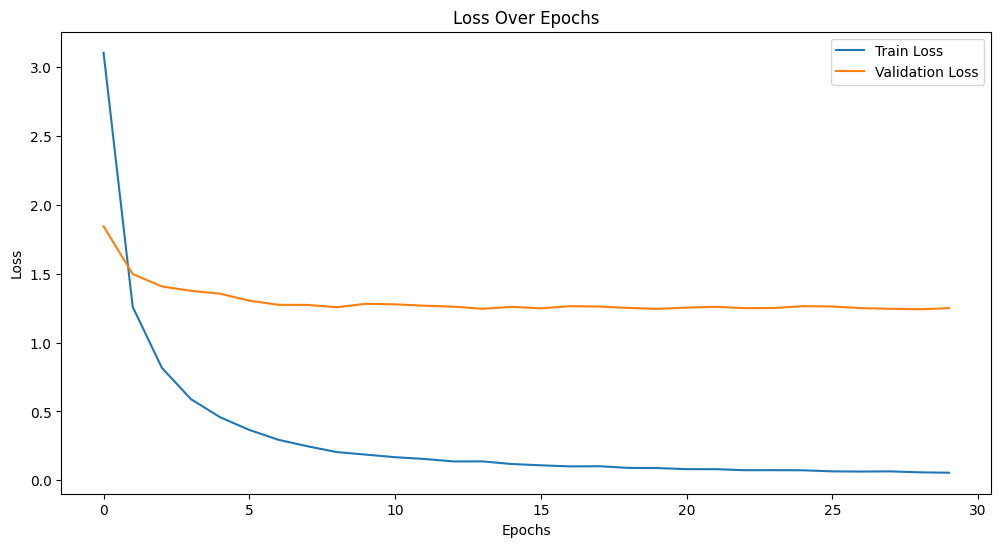

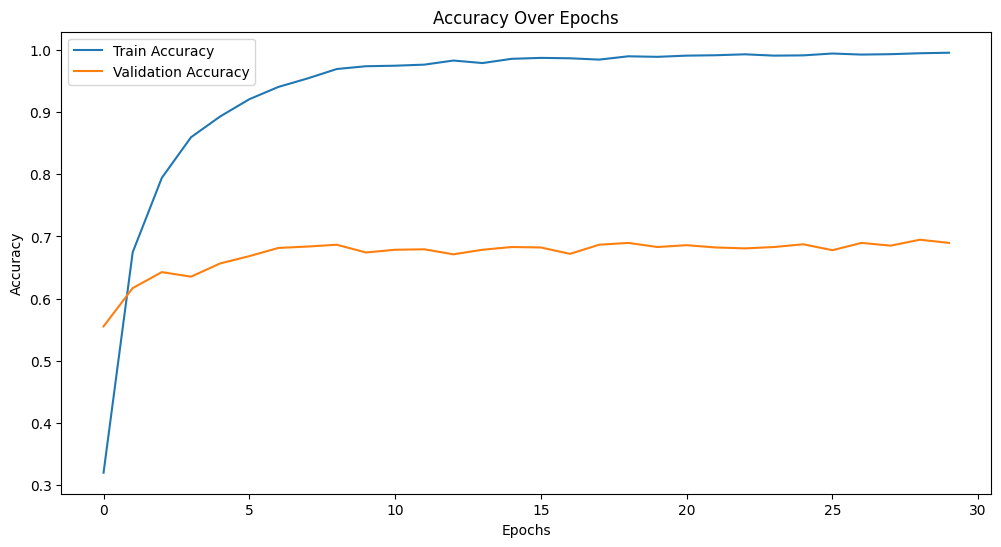

In [ ]:
dataloaders_dict = {'train' : train_loader, 'val' : val_loader}

# 동작 확인
batch_iterator = iter(dataloaders_dict['train'])
inputs, labels = next(batch_iterator)


# pretrained VGG-16 model load
# VGG-16 인스턴스 생성
use_pretrained= True
net = models.alexnet(pretrained=use_pretrained)

net.classifier[6] = nn.Linear(in_features=4096, out_features=150)

# 훈련 모드로 설정
net.train()

# 손실함수 설정
criterion = nn.CrossEntropyLoss()

params_to_update = []

# 학습시킬 파라미터 명
update_param_names = ['classifier.6.weight', 'classifier.6.bias']

# 학습시킬 파라미터 외에 경사를 계산하지 않고 변하지 않도록 설정
for name, param in net.named_parameters() :
    if name in update_param_names :
        param.requires_grad = True
        params_to_update.append(param)
        print(name)
    else :
        param.requires_grad = False

# params to update 내용 확인
print('-' * 50)

# 최적화 기법 사용
optimizer = optim.SGD(params=params_to_update, lr=0.001, momentum=0.9)

## 학습 및 검증
def train_model(net, dataloaders_dict, criterion, optimizer, num_epochs):
    # 손실과 정확도를 저장할 리스트 초기화
    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []

    for epoch in range(num_epochs):
        print(f"Epoch {epoch + 1}/{num_epochs}")

        # 항상 train -> val 순서로 진행
        for phase in ['train', 'val']:
            if phase == 'train':
                net.train()
            else:
                net.eval()

            epoch_loss = 0.0
            epoch_corrects = 0

            # 데이터 로더로 배치 처리
            for inputs, labels in tqdm(dataloaders_dict[phase], desc=f"{phase}"):
                optimizer.zero_grad()

                # 순전파 및 손실 계산
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = net(inputs)
                    loss = criterion(outputs, labels)
                    _, preds = torch.max(outputs, 1)

                    # 훈련 단계에서 역전파 및 가중치 갱신
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # 손실 및 정확도 계산
                epoch_loss += loss.item() * inputs.size(0)
                epoch_corrects += torch.sum(preds == labels.data)

            epoch_loss /= len(dataloaders_dict[phase].dataset)
            epoch_acc = epoch_corrects.double() / len(dataloaders_dict[phase].dataset)

            print(f"{phase} - Loss: {epoch_loss:.4f}, Acc: {epoch_acc:.4f}")

            # 손실 및 정확도 저장
            if phase == 'train':
                train_losses.append(epoch_loss)
                train_accuracies.append(epoch_acc.item())
            else:
                val_losses.append(epoch_loss)
                val_accuracies.append(epoch_acc.item())

    # 학습 결과 시각화
    plot_training_results(train_losses, val_losses, train_accuracies, val_accuracies)


num_epochs = 30
train_model(net, dataloaders_dict, criterion, optimizer, num_epochs=num_epochs)